The first example of using the Matrix-computation mechanism of SuperNeuro based on the Python's Numpy library, called SuperNeuroMAT. Here, we will create a simple network of three neurons, an input, a hidden and an output neuron, connected in a feedforward manner. We will apply input spikes to neuron 0, and observe spikes from all the neurons in the network.

In [1]:
#!pip install git+https://github.com/ORNL/superneuromat

In [2]:
from superneuromat.neuromorphicmodel import NeuromorphicModel

In [3]:
# Configure the simulation parameters:
sim_time = 100
neuron_threshold = 1.0
neuron_reset = 0.0
neuron_refractory = 1
leak = 0.0            

# Instantiate the model that will allow us to define a network of neurons and synapses:
snn_model = NeuromorphicModel()

# Create input neuron
neuron_in = snn_model.create_neuron(
            threshold=neuron_threshold,
            leak=leak,
            reset_state = neuron_reset,
            refractory_period=neuron_refractory,
            )

# Hidden Layer neuron:
neuron_h = snn_model.create_neuron(
            threshold=neuron_threshold,
            leak=leak,
            reset_state = neuron_reset,
            refractory_period=neuron_refractory,
            )

# Output neuron:
neuron_o = snn_model.create_neuron(
            threshold=neuron_threshold,
            leak=leak,
            reset_state = neuron_reset,
            refractory_period=neuron_refractory,
            )

# Create Synpase:
snn_model.create_synapse(neuron_in, neuron_h, 
            delay = 2,
            weight = 4,
        )

snn_model.create_synapse(neuron_h, neuron_o,
            delay = 3,
            weight = 2,
        )


In [4]:
# Apply Spikes:
snn_model.add_spike(0, neuron_in, 4)    # (spike_time, node_id, spike_value)
snn_model.add_spike(10, neuron_in, 4)

# Create a list of spikes for all input and output spikes of the network:
spike_times = []
spike_times.append([0, 10])   # input spikes applied to neuron 0

# Setup the model
snn_model.setup()

#Begin simulation:
snn_model.simulate(sim_time)

In [5]:
# To display the model:
#display(snn_model.__repr__)
print(snn_model)

Number of neurons: 6
Number of synapses: 5

Neuron Info: 
 Neuron ID  Threshold  Leak  Reset State  Refractory Period
         0        1.0   0.0          0.0                  1
         1        1.0   0.0          0.0                  1
         2        1.0   0.0          0.0                  1
         3        0.0   inf          0.0                  0
         4        0.0   inf          0.0                  0
         5        0.0   inf          0.0                  0

Synapse Info: 
 Pre Neuron ID  Post Neuron ID  Weight  Delay  STDP Enabled
             0               3     1.0      1         False
             3               1     4.0      1         False
             1               4     1.0      1         False
             4               5     1.0      1         False
             5               2     2.0      1         False

STDP Info: 
STDP Enabled: False 
STDP Time Steps: 0 
STDP A positive: [] 
STDP A negative: []

Input Spikes: 
 Time  Neuron ID  Value
    0      

In [6]:
# Get the spike times from all neurons defined in the network:
import numpy as np

network_spikes = snn_model.spike_train
network_spikes = np.array(network_spikes)
#print(network_spikes.shape)

print('Spike times for neuron 0:', np.where(network_spikes[:,0]), np.where(network_spikes[:,1]), np.where(network_spikes[:,2]))

Spike times for neuron 0: (array([ 0, 10]),) (array([ 2, 12]),) (array([ 5, 15]),)


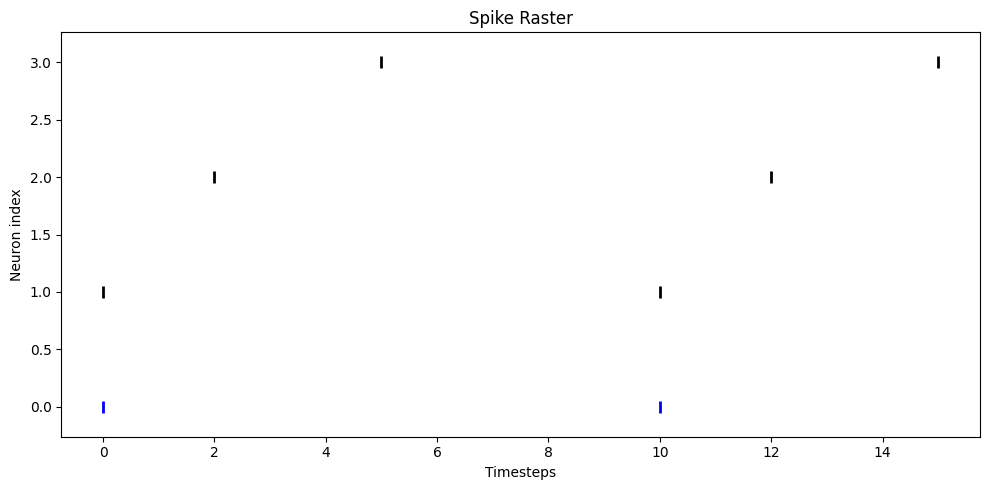

In [7]:
# Plot the spike raster:
import matplotlib.pyplot as plt


# Append the network spike to the spike_times list for visualization:
for n in range(3):
    spike_times.append(np.where(network_spikes[:,n])[0])


colors1 = ['b', 'k', 'k', 'k']  #Input spikes in blue and network spikes in black
fig, axs = plt.subplots(1,1,figsize=(10,5))
axs.eventplot(spike_times,colors=colors1, lineoffsets=1,linelengths=0.1,linewidths=2.0)

plt.title('Spike Raster')
plt.xlabel('Timesteps')
plt.ylabel('Neuron index')
plt.tight_layout()
